#**BigMart Sales Prediction**
##Introduction
This is a Machine Learning project on the BigMart Sales Dataset. It's a Regression Task. The purpose of this project is to:
- Understand the Dataset & cleanup
- Build Regression models to predict the sales of the products
- Evaluate the models & compare their respective scores like R2, RMSE, etc.


This project is sequenced in the following steps:
- step1: Problem Statement
- step2: BigMart Dataset Description
- step3: Data Exploration
- step4: Data Cleaning
- step5: Feature Engineering
- step6: Data Preprocessing
- step7: Model Selection
- step8: Training and Evaluation
- step9: Cross Validation
- step10: Interpretation and Insight

#**Step1: Problem Statement**
Sales prediction is an important aspect of different companies. It allows companies to efficiently allocate resources, to estimate achievable sales revenue and to plan a better strategy for future growth of the company.

**The aim** is to build *some predictive models* to predict *the sales of each product at a particular store* and compare their scores.
Using these models, BigMart will try to understand **the properties of products and stores** which play a key role in increasing sales.

This is **a supervised machine learning problem** with a target label as (Item_Outlet_Sales). Also since we are expected to predict the sales price for a given product, it becomes **a regression task**.

#**step2:   BigMart Dataset Description**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, 12 attributes of each product and store have been defined, as below mentioned:
1.   **Item_Identifier** ---- Unique product ID
2.   **Item_Weight** ---- Weight of product
3.   **Item_Fat_Content** ---- Whether the product is low fat or not
4.   **Item_Visibility** ---- The % of the total display area of all products in a store allocated to the particular product
5.   **Item_Type** ---- The category to which the product belongs
6.   **Item_MRP** ---- Maximum Retail Price (list price) of the product
7.   **Outlet_Identifier** ---- Unique store ID
8.   **Outlet_Establishment_Year** ---- The year in which the store was established
9.   **Outlet_Size** ---- The size of the store in terms of ground area covered
10.  **Outlet_Location_Type**---- The type of city in which the store is located
11.  **Outlet_Type** ---- Whether the outlet is just a grocery store or some sort of supermarket
12.  **Item_Outlet_Sales** ---- sales of the product in a particular store. This is **the outcome variable to be predicted.**

This Dataset can be downloaded from: [kaggle](https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data)

Kaggle have both train.csv(8523,12) & test.csv(5681,11) sets, but we don't have the outcome column of test and we can't evaluate the model, so we just used train set.

In [5]:
# Download DataSet
!gdown https://drive.google.com/uc?id=1YZyU9Fb8GQ9m9peWiHgr-WJYZNWJcz47
# !gdown 1YZyU9Fb8GQ9m9peWiHgr-WJYZNWJcz47


Downloading...
From: https://drive.google.com/uc?id=1YZyU9Fb8GQ9m9peWiHgr-WJYZNWJcz47
To: /content/BigMart_Train.csv
100% 870k/870k [00:00<00:00, 107MB/s]


In [35]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import KFold,GroupKFold,cross_val_score,cross_validate
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score


In [7]:
#Loading the Dataset
data = pd.read_csv('BigMart_Train.csv')

#check the 5 sample rows of dataset
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6092,FDX13,7.725,Low Fat,0.047743,Canned,248.3092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
113,FDX34,NaN,Low Fat,0.071637,Snack Foods,121.7098,OUT027,1985,Medium,Tier 3,Supermarket Type3,4097.3332
5780,FDU19,8.770,Regular,0.046844,Fruits and Vegetables,174.2422,OUT049,1999,Medium,Tier 1,Supermarket Type1,1379.5376
3616,FDF57,14.500,Regular,0.058947,Fruits and Vegetables,168.6448,OUT045,2002,NaN,Tier 2,Supermarket Type1,2897.5616
6134,FDF40,NaN,Regular,0.022403,Dairy,250.9092,OUT027,1985,Medium,Tier 3,Supermarket Type3,8217.3036


In [8]:
# Dimension of the dataset
data.shape

(8523, 12)

In [9]:
#name of columns
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

#**step3: Data Exploration**

In this step, after having a look at the dataset & some plots, certain information about the data was explored:
- 5 **numerical** and 7 **categorical** columns
- **'Item_weight'** and **'Outlet_size'** have **missing values**
-  the **min** value of **'Item_Visibility'** is **zero**, it's impossible because each product takes some space
- dataset is about 1559 unique products in 10 unique outlet
- *Item_Type* contains 16 unique values and most of them is Fruits and Vegetables
- Each unique *Item_Identifier* started with FD, DR, NC that refer to Food, Drink and Non-Consumable
- *Two types* of **Item_Fat_Content** are there but some of them are misscoded as (*'low fat', 'LF'*) instead of **'Low Fat'** and *'reg'* instead of **'Regular'**


In [10]:
#some information about the attributes(datatypes & null values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
#Check for Null values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
#Check statistical information of numerical values

numerical_features = data.select_dtypes(include=[np.number])
data.describe(include=[np.number])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
#Check statistical information of categorical values

categorial_features = data.select_dtypes(include=object)
data.describe(include=object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [14]:
#Check Unique Values of categorical attributes and their counts

for cat_col in categorial_features:
  if len(data[cat_col].unique()) <20:
    print("\n\n===> Unique Values & it's count of '{}' : \n{}".format(cat_col, data[cat_col].value_counts()))
  else:
    print("\n\n===> Unique Values of '{}' : \n{}".format(cat_col, data[cat_col].unique()))



===> Unique Values of 'Item_Identifier' : 
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


===> Unique Values & it's count of 'Item_Fat_Content' : 
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


===> Unique Values & it's count of 'Item_Type' : 
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


===> Unique Values & it's count of 'Outlet_Identifier' : 
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT01


#**step4: Data Cleaning**
In this step, we did some Data Cleaning Techniques for Preparing our data, like find and impute Missing values, remove and fix incorrect values. There are different methods to treat missing values based on the problem and the data like, deleting the rows, Mean/Median/Mode Imputation, etc.
## Missing values in *Item_Weight*

> it's a continuous variable, missing values can be replaced with mean or median. it's boxplot, shows no "Outliers" and we can impute the missing values with *Mean*. for a better result Missing values of Item_Weight filled by **the mean of weight for that particular item**.



## Missing values in *Outlet_Size*


> it's a categorical variable, missing values can be replaced with mode of the given values. for a better result Missing values of Outlet_Size filled by **the mode of the Outlet_Size for that particular type of outlet**.

## Zero values in *Item_Visibility*  


> it's impossible because each product needs to be visible, so we can treat these zero values as a missing value. Item_Visibility is a continuous variable, missing values can be replaced with mean or median, since it's right skewed & has outliers so we can't use mean to replace zero values (mean affected by outliers), median is more appropriate. for a better result Zero values of Item_Visibility replaced by **the median of Visibility for that particular item**.



## Clean values in *Item_Fat_Content*


> Two types of Item_Fat_Content are there but some of them are misscoded as ('low fat', 'LF') instead of 'Low Fat' and 'reg' instead of 'Regular', so we combined values in two categories : Low Fat and Regular.








In [15]:
# Impute Missing Values of Item_Weight
# use aggregation funtion of pivot table, for keeping average of weights. ** For those unique items that they don't have any weights use the mean of whole column.

mean_Wper_items = pd.pivot_table(data, columns='Item_Identifier', values='Item_Weight', aggfunc=np.mean, fill_value=data['Item_Weight'].mean() , dropna=False)
mean_Wper_items

Item_Identifier,DRA12,DRA24,DRA59,DRB01,DRB13,DRB24,DRB25,DRB48,DRC01,DRC12,...,NCZ05,NCZ06,NCZ17,NCZ18,NCZ29,NCZ30,NCZ41,NCZ42,NCZ53,NCZ54
Item_Weight,11.6,19.35,8.27,7.39,6.115,8.785,12.3,16.75,5.92,17.85,...,8.485,19.6,12.15,7.825,15.0,6.59,19.85,10.5,9.6,14.65


In [16]:
# Impute missing values of Item_Weight with mean weight based on the Item_Identifier variabe

missing_values = data['Item_Weight'].isnull()
data.loc[missing_values, 'Item_Weight'] = data.loc[missing_values, 'Item_Identifier'].apply(lambda x: mean_Wper_items[x].Item_Weight)

In [17]:
# Impute Missing Values of Outlet_Size
# use aggregation funtion of pivot table, for keeping mode of Outlet_Size.

mode_Osize_per_Otype = pd.pivot_table(data, columns='Outlet_Type', values='Outlet_Size', aggfunc=lambda x: x.mode().iat[0], fill_value=data['Outlet_Size'].mode()[0] , dropna=False)
mode_Osize_per_Otype


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [18]:
# Impute missing values of Outlet_Size with mode Outlet_Size based on the Outlet_Type variabe

missing_valuessize = data['Outlet_Size'].isnull()
data.loc[missing_valuessize, 'Outlet_Size'] = data.loc[missing_valuessize, 'Outlet_Type'].apply(lambda x: mode_Osize_per_Otype[x].Outlet_Size)


In [19]:
# Check for nulls again
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
# Replace zero values of Item_Visibility, pivot table for median of visibility(each particular item). For those unique items that their visibilities are 0 use the median of whole column.

median_visibility = pd.pivot_table(data, columns='Item_Identifier', values='Item_Visibility', aggfunc=np.median )
median_visibility.replace(to_replace=0, value=data['Item_Visibility'].median(), inplace=True)
# for i,v in median_visibility.items():
#   if v[0]==0:
#     median_visibility[i][0]=data['Item_Visibility'].median()
median_visibility
# median_visibility['FDY07'][0]

Item_Identifier,DRA12,DRA24,DRA59,DRB01,DRB13,DRB24,DRB25,DRB48,DRC01,DRC12,...,NCZ05,NCZ06,NCZ17,NCZ18,NCZ29,NCZ30,NCZ41,NCZ42,NCZ53,NCZ54
Item_Visibility,0.041012,0.03999,0.128027,0.082171,0.007055,0.020614,0.069595,0.024849,0.019219,0.037856,...,0.058121,0.094308,0.079512,0.186357,0.071444,0.02618,0.064409,0.011286,0.024515,0.083489


In [21]:
# Impute zero values with median visibility of that product

zero_values = (data['Item_Visibility'] == 0)
print ('Number of zero values: {}'.format(sum(zero_values)))

data.loc[zero_values,'Item_Visibility'] = data.loc[zero_values,'Item_Identifier'].apply(lambda x: median_visibility[x].Item_Visibility)
print ('Number of zero values after replacing with median: {}'.format(sum(data['Item_Visibility'] == 0)))

Number of zero values: 526
Number of zero values after replacing with median: 0


In [22]:
# Combine values in two categories : Low Fat and Regular
data['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}, inplace=True)
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#step5: Feature engineering
Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model. process like Feature Extranction, Feature Selection, Encoding categorical data, Correlation Analysis, etc.
##Extract *New_Item_Type*


> Each unique Item_Identifier started with FD, DR, NC that refer to Food, Drink and Non-Consumable, so we can extract new feature from the existing attribute, as New_Item_Type.

##Update *Item_Fat_Content*


> we change the values of Item_Fat_Content whereever New_Item_Type is non-consumable, because those items cannot have any fat content.


##Encoding Categorical Data


> Indented block









In [23]:
# Create New_Item_Type variable that extracted from Item_Identifier column
data['New_Item_Type'] = data['Item_Identifier'].apply(lambda x:x[0:2])
data['New_Item_Type'].replace({'FD': 'Food' , 'DR': 'Drink' , 'NC': 'Non_Consumable' }, inplace=True)
data['New_Item_Type'].value_counts()

Food              6125
Non_Consumable    1599
Drink              799
Name: New_Item_Type, dtype: int64

In [24]:
# Update Item_Fat_Content values, add "None" value for Non_Consumable items
data.loc[data['New_Item_Type'] == 'Non_Consumable' , 'Item_Fat_Content'] = 'None'
data['Item_Fat_Content'].value_counts()

Low Fat    3918
Regular    3006
None       1599
Name: Item_Fat_Content, dtype: int64

In [25]:
# Encoding Categorical Data
#LabelEncoder:
lblencoder = LabelEncoder()
attr_to_le = ['Item_Identifier', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type']
#attr_to_le = ['Item_Identifier', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type','Item_Fat_Content', 'Outlet_Identifier', 'New_Item_Type', 'Outlet_Type']
for attr in attr_to_le:
  data[attr] = lblencoder.fit_transform(data[attr])

le = LabelEncoder()
outlet_IDs = le.fit_transform(data['Outlet_Identifier'])
item_IDS = data['Item_Identifier']

#get_dummies:
attr_to_gd = ['Item_Fat_Content', 'Outlet_Identifier', 'New_Item_Type', 'Outlet_Type']
data = pd.get_dummies(data, columns=attr_to_gd)

print(data.shape)
data.head()

(8523, 29)


,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,New_Item_Type_Drink,New_Item_Type_Food,New_Item_Type_Non_Consumable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.30,0.016047,4,249.8092,1999,1,0,3735.1380,1,...,0,0,1,0,1,0,0,1,0,0
1,8,5.92,0.019278,14,48.2692,2009,1,2,443.4228,0,...,0,0,0,1,0,0,0,0,1,0
2,662,17.50,0.016760,10,141.6180,1999,1,0,2097.2700,1,...,0,0,1,0,1,0,0,1,0,0
3,1121,19.20,0.022861,6,182.0950,1998,2,2,732.3800,0,...,0,0,0,0,1,0,1,0,0,0
4,1297,8.93,0.006590,9,53.8614,1987,0,2,994.7052,0,...,0,0,0,0,0,1,0,1,0,0


In [26]:
# Check new columns
data.columns
# data.isnull().sum()

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Item_Outlet_Sales', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_None', 'Item_Fat_Content_Regular',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'New_Item_Type_Drink', 'New_Item_Type_Food',
       'New_Item_Type_Non_Consumable', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [27]:
# Check
co_matrix = data.corr()
co_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales                1.000000
Item_MRP                         0.567574
Outlet_Type_Supermarket Type3    0.311192
Outlet_Identifier_OUT027         0.311192
Outlet_Type_Supermarket Type1    0.108765
Outlet_Location_Type             0.089367
Outlet_Identifier_OUT035         0.052823
Outlet_Identifier_OUT049         0.034264
Outlet_Identifier_OUT017         0.032610
New_Item_Type_Food               0.031905
Outlet_Identifier_OUT013         0.024170
Outlet_Identifier_OUT046         0.019803
Item_Fat_Content_Regular         0.018719
Item_Type                        0.017048
Item_Weight                      0.013164
Item_Identifier                  0.002869
Outlet_Identifier_OUT045         0.002274
Item_Fat_Content_Low Fat        -0.009438
Item_Fat_Content_None           -0.010861
New_Item_Type_Non_Consumable    -0.010861
New_Item_Type_Drink             -0.034672
Outlet_Identifier_OUT018        -0.038059
Outlet_Type_Supermarket Type2   -0.038059
Outlet_Establishment_Year       -0

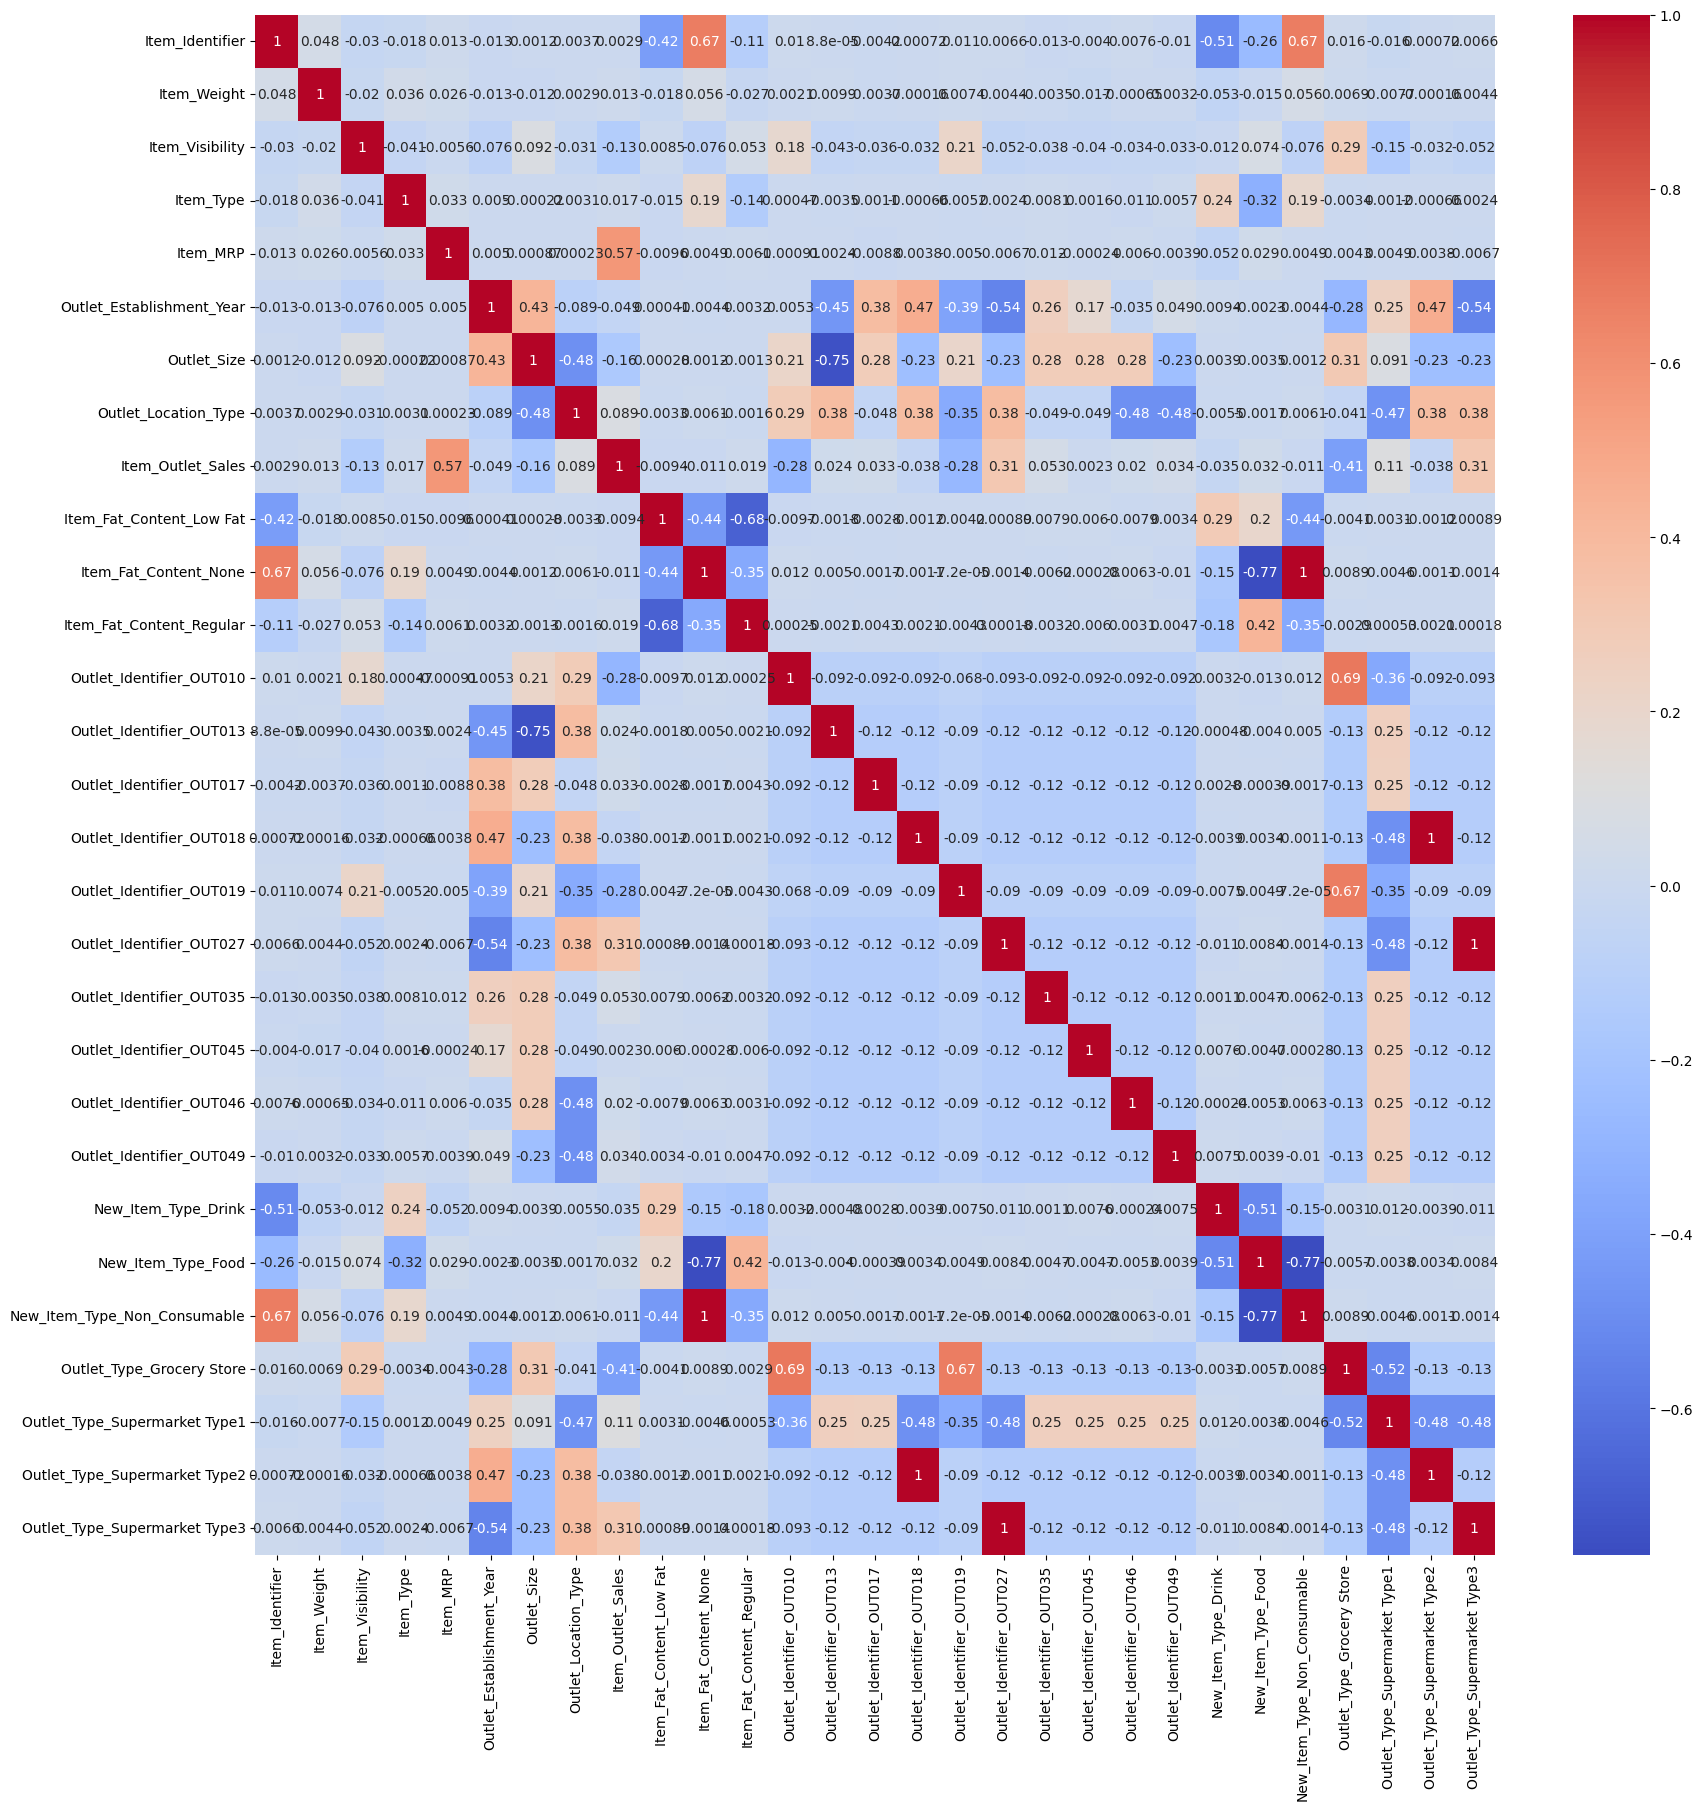

In [28]:

plt.figure(figsize=(20,20))
sns.heatmap(co_matrix, annot=True, cmap='coolwarm' )
plt.show()

In [29]:
# Delete unnecessary features
data.drop('Item_Identifier', axis=1, inplace=True)
# data.drop(['Item_Identifier' , 'Item_Type'], axis=1, inplace=True)

In [30]:
data.shape

(8523, 28)

#step6: Data Preprocessing
In thi step....... Data Preprocessing(Normalization,)train test split

In [86]:
# Set features and target
X = data.drop('Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

# Set sacaler for X
#scaler = MinMaxScaler()

# Set type of cross validation(KFold or GroupKFold , k=10)
#cross_val = 'KFold'
cross_val = ['GroupKFold',9]
# cross_val = ['KFold', 8]



# step7: Model Selection


In [79]:
ML_models_info = pd.DataFrame(columns=['model', 'validation' ,'MSE', 'RMSE', 'r2_score'])




In [40]:


def training_evaluation(model_name, model, cross_val, X, y):
  #make pipeline for normalizatuion, train & evaluation
  pipeline_model = Pipeline(steps=[('scaler', MinMaxScaler()) , ('model', model)], verbose=True)
  scoring = ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
  #set cross validation
  if (cross_val[0] == 'GroupKFold'):
    gkf = GroupKFold(n_splits=cross_val[1])
    #evaluate the model with multiple metrics
    scores = cross_validate(pipeline_model, X, y, cv=gkf, groups=outlet_IDs.tolist(), scoring=scoring , n_jobs=-1)
  elif (cross_val[0] == 'KFold'):
    kf = KFold(n_splits=cross_val[1], shuffle=False)
    #evaluate the model with multiple metrics
    scores = cross_validate(pipeline_model, X, y, cv=kf, scoring=scoring, n_jobs=-1 )
  #insert mse, rmse & r2_score into a dataframe for comparing the models
  ML_models_info.loc[len(ML_models_info)] = [model_name, cross_val[0], np.absolute(scores['test_neg_mean_squared_error']).mean(), np.absolute(scores['test_neg_root_mean_squared_error']).mean(), scores['test_r2'].mean()]

  print('{} with {} report: \n'.format(model_name, cross_val[0]))
  print('The average of MSE is : %0.3f  (+/- %0.2f)'% (np.absolute(scores['test_neg_mean_squared_error']).mean(), np.absolute(scores['test_neg_mean_squared_error']).std()))
  print('The average of RMSE is : %0.3f  (+/- %0.2f)'% (np.absolute(scores['test_neg_root_mean_squared_error']).mean(), np.absolute(scores['test_neg_root_mean_squared_error']).std()))
  print('The average of R2 score is : %0.3f  (+/- %0.2f)'% (scores['test_r2'].mean(), scores['test_r2'].std()))


# step7: Training and Evaluation


In [41]:
linear_regression_model = LinearRegression()
training_evaluation('Linear Regression', linear_regression_model, cross_val, X, y)

Linear Regression with GroupKFold report: 

The average of MSE is : 34315038454322943563266963537920.000  (+/- 46076105652149717257447492550656.00)
The average of RMSE is : 3683422051527582.000  (+/- 4554935833208113.00)
The average of R2 score is : -12459238320232180362510336.000  (+/- 18263594812194688384106496.00)


In [97]:
# cross_val = ['GroupKFold',7]
cross_val = ['KFold', 7]
linear_regression_model = LinearRegression()
  #make pipeline for normalizatuion, train & evaluation
pipeline_model = Pipeline(steps=[('scaler', MinMaxScaler()) , ('model', linear_regression_model)], verbose=True)
scoring = ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
  #set cross validation
if (cross_val[0] == 'GroupKFold'):
  gkf = GroupKFold(n_splits=cross_val[1])
    #evaluate the model with multiple metrics
  # X_gp_OIDs=X.drop(['Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018','Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027','Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045','Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049'], axis=1)
  # scores = cross_validate(pipeline_model, X_gp_OIDs, y, cv=gkf, groups=outlet_IDs.tolist(), scoring=scoring , n_jobs=-1)

  # X_gp_OItems= X.drop(['Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018','Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027','Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045','Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049'], axis=1)
  #X_gp_OItems= X.drop('Item_Type',axis=1)
  scores = cross_validate(pipeline_model, X, y, cv=gkf, groups=item_IDS.tolist(), scoring=scoring , n_jobs=-1)
elif (cross_val[0] == 'KFold'):
  kf = KFold(n_splits=cross_val[1], shuffle=False)
    #evaluate the model with multiple metrics
  X_OIDs=X.drop(['Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018','Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027','Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045','Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049'], axis=1)
  scores = cross_validate(pipeline_model, X, y, cv=kf, scoring=scoring, n_jobs=-1 )
  #insert mse, rmse & r2_score into a dataframe for comparing the models
ML_models_info.loc[len(ML_models_info)] = ['linear_regression_model', cross_val[0], np.absolute(scores['test_neg_mean_squared_error']).mean(), np.absolute(scores['test_neg_root_mean_squared_error']).mean(), scores['test_r2'].mean()]

print('{} with {} report: \n'.format('linear_regression_model', cross_val[0]))
print('The average of MSE is : %0.3f  (+/- %0.2f)'% (np.absolute(scores['test_neg_mean_squared_error']).mean(), np.absolute(scores['test_neg_mean_squared_error']).std()))
print('The average of RMSE is : %0.3f  (+/- %0.2f)'% (np.absolute(scores['test_neg_root_mean_squared_error']).mean(), np.absolute(scores['test_neg_root_mean_squared_error']).std()))
print('The average of R2 score is : %0.3f  (+/- %0.2f)'% (scores['test_r2'].mean(), scores['test_r2'].std()))

linear_regression_model with KFold report: 

The average of MSE is : 1276419.729  (+/- 48425.20)
The average of RMSE is : 1129.585  (+/- 21.41)
The average of R2 score is : 0.561  (+/- 0.01)


#step8: Cross Validation


#step9: Interpretation and Insight